# FULL WIND TURBINE SCADA PROJECT

In [1]:
from google.colab import files
uploaded = files.upload()


Saving T1.csv to T1.csv


## 📌 Introduction

This project analyzes real-world Wind Turbine SCADA (Supervisory Control and Data Acquisition) data.  
The main goal is to build:

- Exploratory Data Analysis (EDA)
- Time-series forecasting using LSTM (for 4 parameters)
- Unsupervised anomaly detection
- AI-based performance score generator (0–100)
- Turbine state classification (Good, Moderate, Poor)

Understanding wind turbine behavior helps in:
- Increasing energy production
- Detecting faults early
- Improving turbine efficiency
- Predictive maintenance


In [2]:
import pandas as pd

# Replace with the uploaded filename
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df.head()


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%d %m %Y %H:%M")
df = df.set_index('Date/Time')
df.head()


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


## 📁 Dataset Description

The dataset contains SCADA sensor readings from a wind turbine.

### **Columns**
| Column Name | Meaning |
|-------------|---------|
| Date/Time | Timestamp of reading |
| LV ActivePower (kW) | Actual electrical power output |
| Wind Speed (m/s) | Wind speed at turbine |
| Theoretical_Power_Curve (KWh) | Expected power output |
| Wind Direction (°) | Direction of incoming wind |

This dataset is ideal for performance monitoring, anomaly detection, and forecasting.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50530 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LV ActivePower (kW)            50530 non-null  float64
 1   Wind Speed (m/s)               50530 non-null  float64
 2   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 3   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


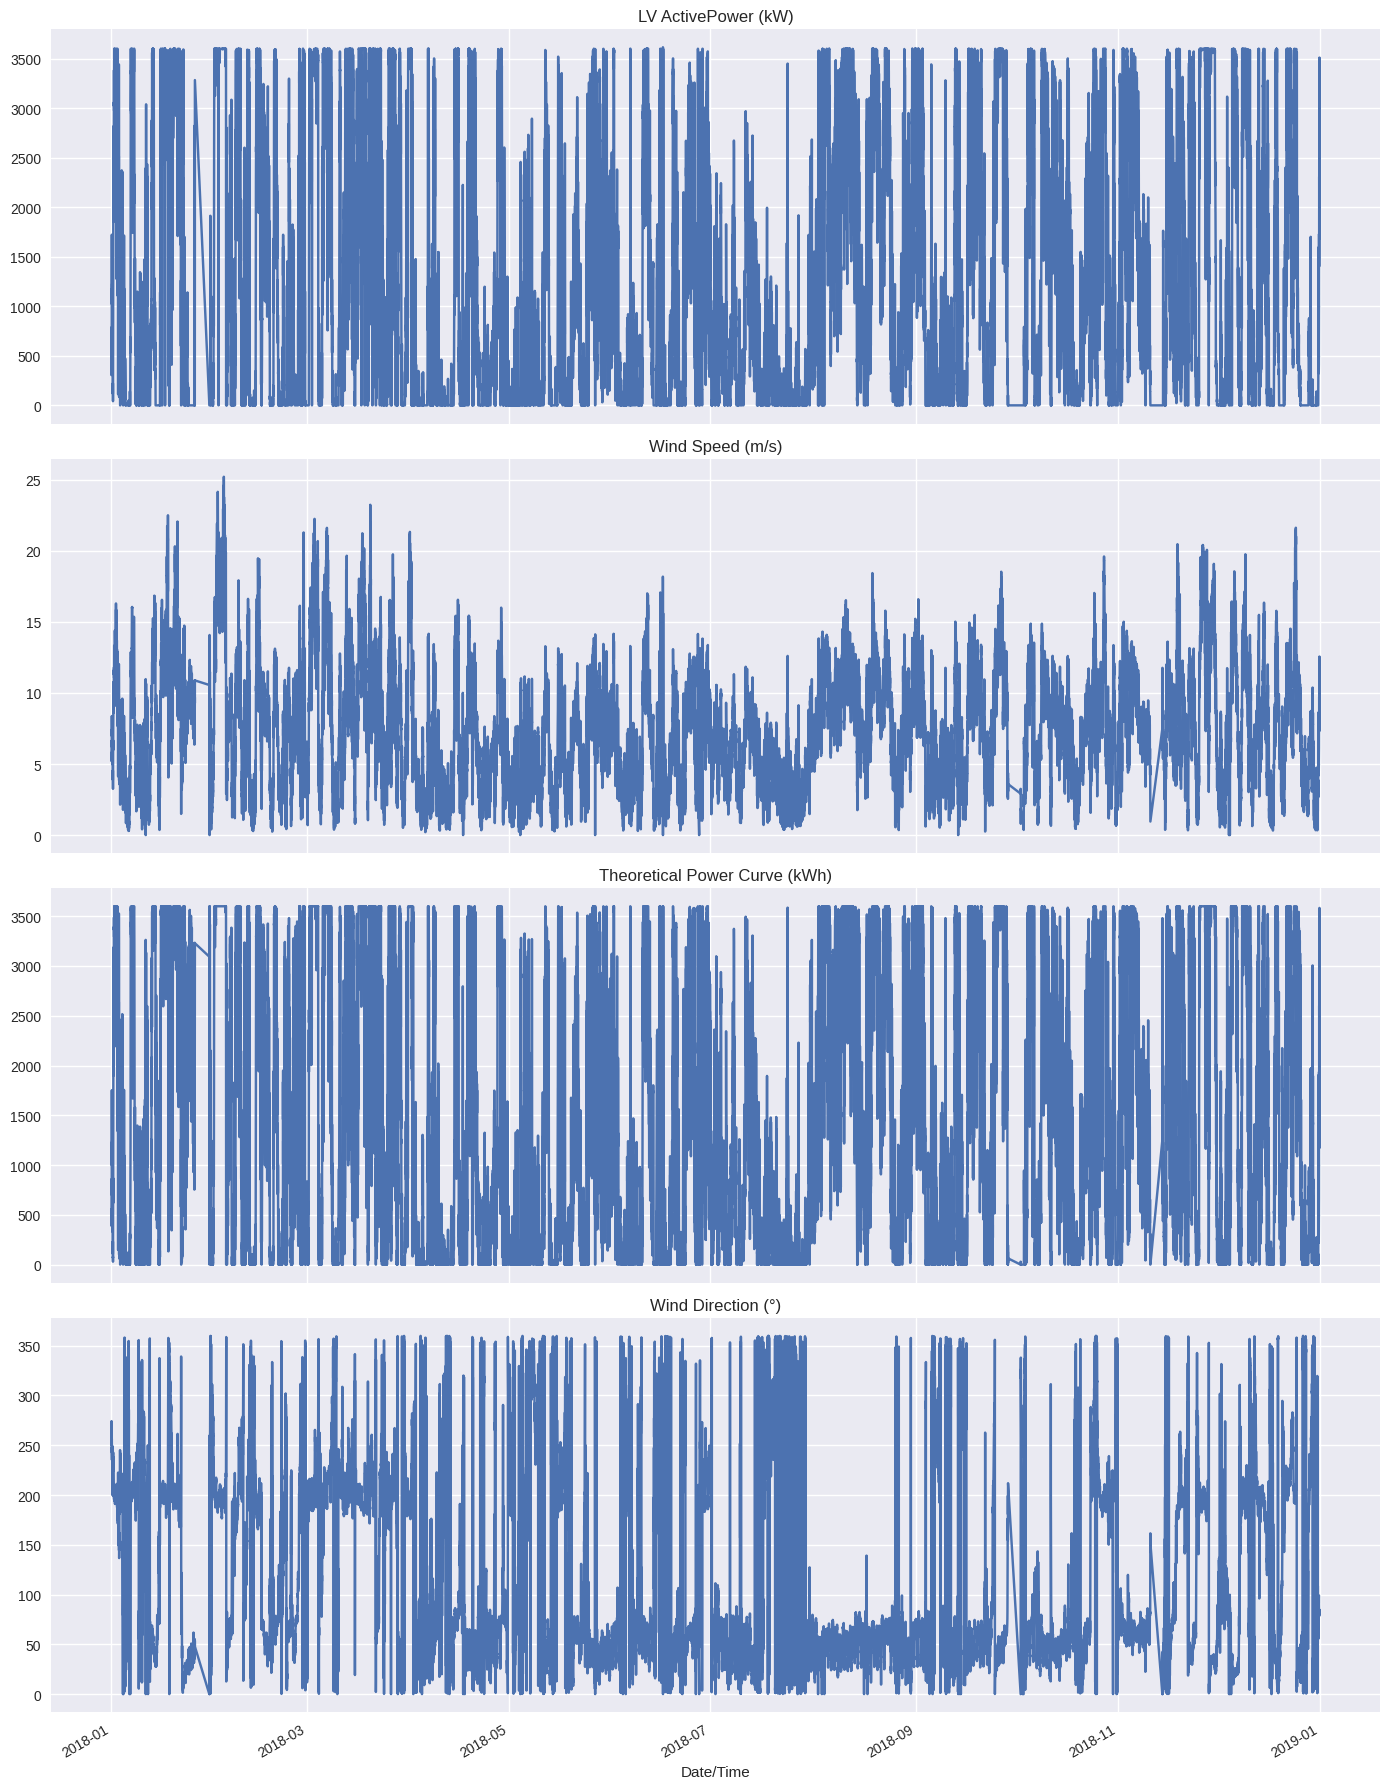

In [8]:
fig, axes = plt.subplots(4, 1, figsize=(14, 18), sharex=True)

df['LV ActivePower (kW)'].plot(ax=axes[0], title='LV ActivePower (kW)')
df['Wind Speed (m/s)'].plot(ax=axes[1], title='Wind Speed (m/s)')
df['Theoretical_Power_Curve (KWh)'].plot(ax=axes[2], title='Theoretical Power Curve (kWh)')
df['Wind Direction (°)'].plot(ax=axes[3], title='Wind Direction (°)')

plt.tight_layout()
plt.show()


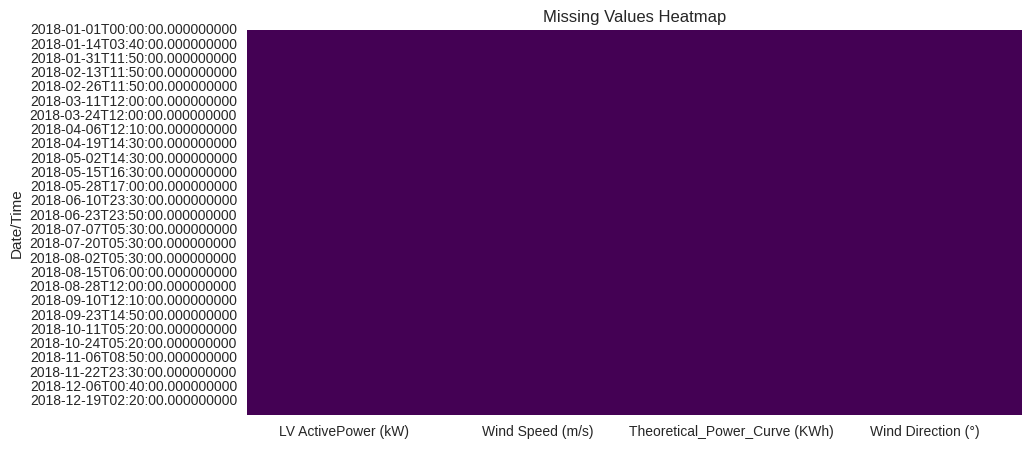

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [10]:
abnormal = df[(df['LV ActivePower (kW)'] < 0) | (df['Wind Speed (m/s)'] < 0)]
abnormal.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-03 16:00:00,-0.393068,2.185888,0.000000,238.410294
2018-01-06 15:50:00,-0.456533,2.949518,0.000000,204.901093
2018-01-10 21:10:00,-0.038067,3.248698,28.906391,279.040100
2018-01-12 03:40:00,-0.331467,2.574092,0.000000,214.811203
2018-01-12 04:30:00,-0.959000,3.333948,35.608029,206.130402


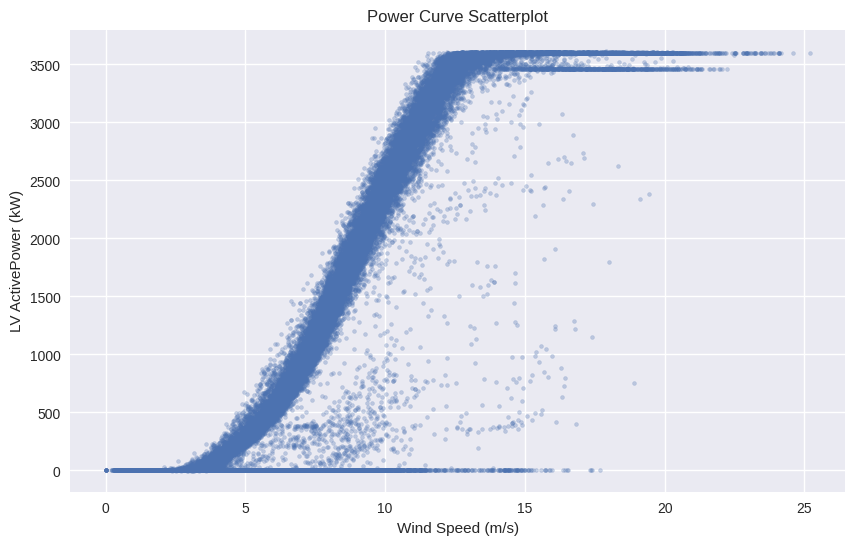

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df['Wind Speed (m/s)'], df['LV ActivePower (kW)'], s=8, alpha=0.3)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("LV ActivePower (kW)")
plt.title("Power Curve Scatterplot")
plt.show()


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [13]:
data = df[['LV ActivePower (kW)',
           'Wind Speed (m/s)',
           'Theoretical_Power_Curve (KWh)',
           'Wind Direction (°)']]

data.head()


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [14]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [15]:
def create_dataset(dataset, window_size=24):
    X = []
    y = []
    for i in range(window_size, len(dataset)):
        X.append(dataset[i-window_size:i])
        y.append(dataset[i])
    return np.array(X), np.array(y)

WINDOW_SIZE = 24
X, y = create_dataset(scaled_data, WINDOW_SIZE)


In [16]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [17]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(WINDOW_SIZE, 4)),
    LSTM(32),
    Dense(4)  # output: 4 variables
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,212 (118.02 KB)

 Trainable params: 30,212 (118.02 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.0157 - val_loss: 0.0041
Epoch 2/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 0.0063 - val_loss: 0.0039
Epoch 3/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - loss: 0.0059 - val_loss: 0.0041
Epoch 4/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.0058 - val_loss: 0.0041
Epoch 5/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 0.0057 - val_loss: 0.0039
Epoch 6/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 0.0056 - val_loss: 0.0038
Epoch 7/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 0.0055 - val_loss: 0.0038
Epoch 8/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.0057 - val_loss: 0.0038
Epoch 9/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.0056 - val_loss: 0.0038
Epoch 10/10
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 0.0056 - val_loss: 0.0038


In [19]:
pred_scaled = model.predict(X_test)
pred = scaler.inverse_transform(pred_scaled)
actual = scaler.inverse_transform(y_test)


316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


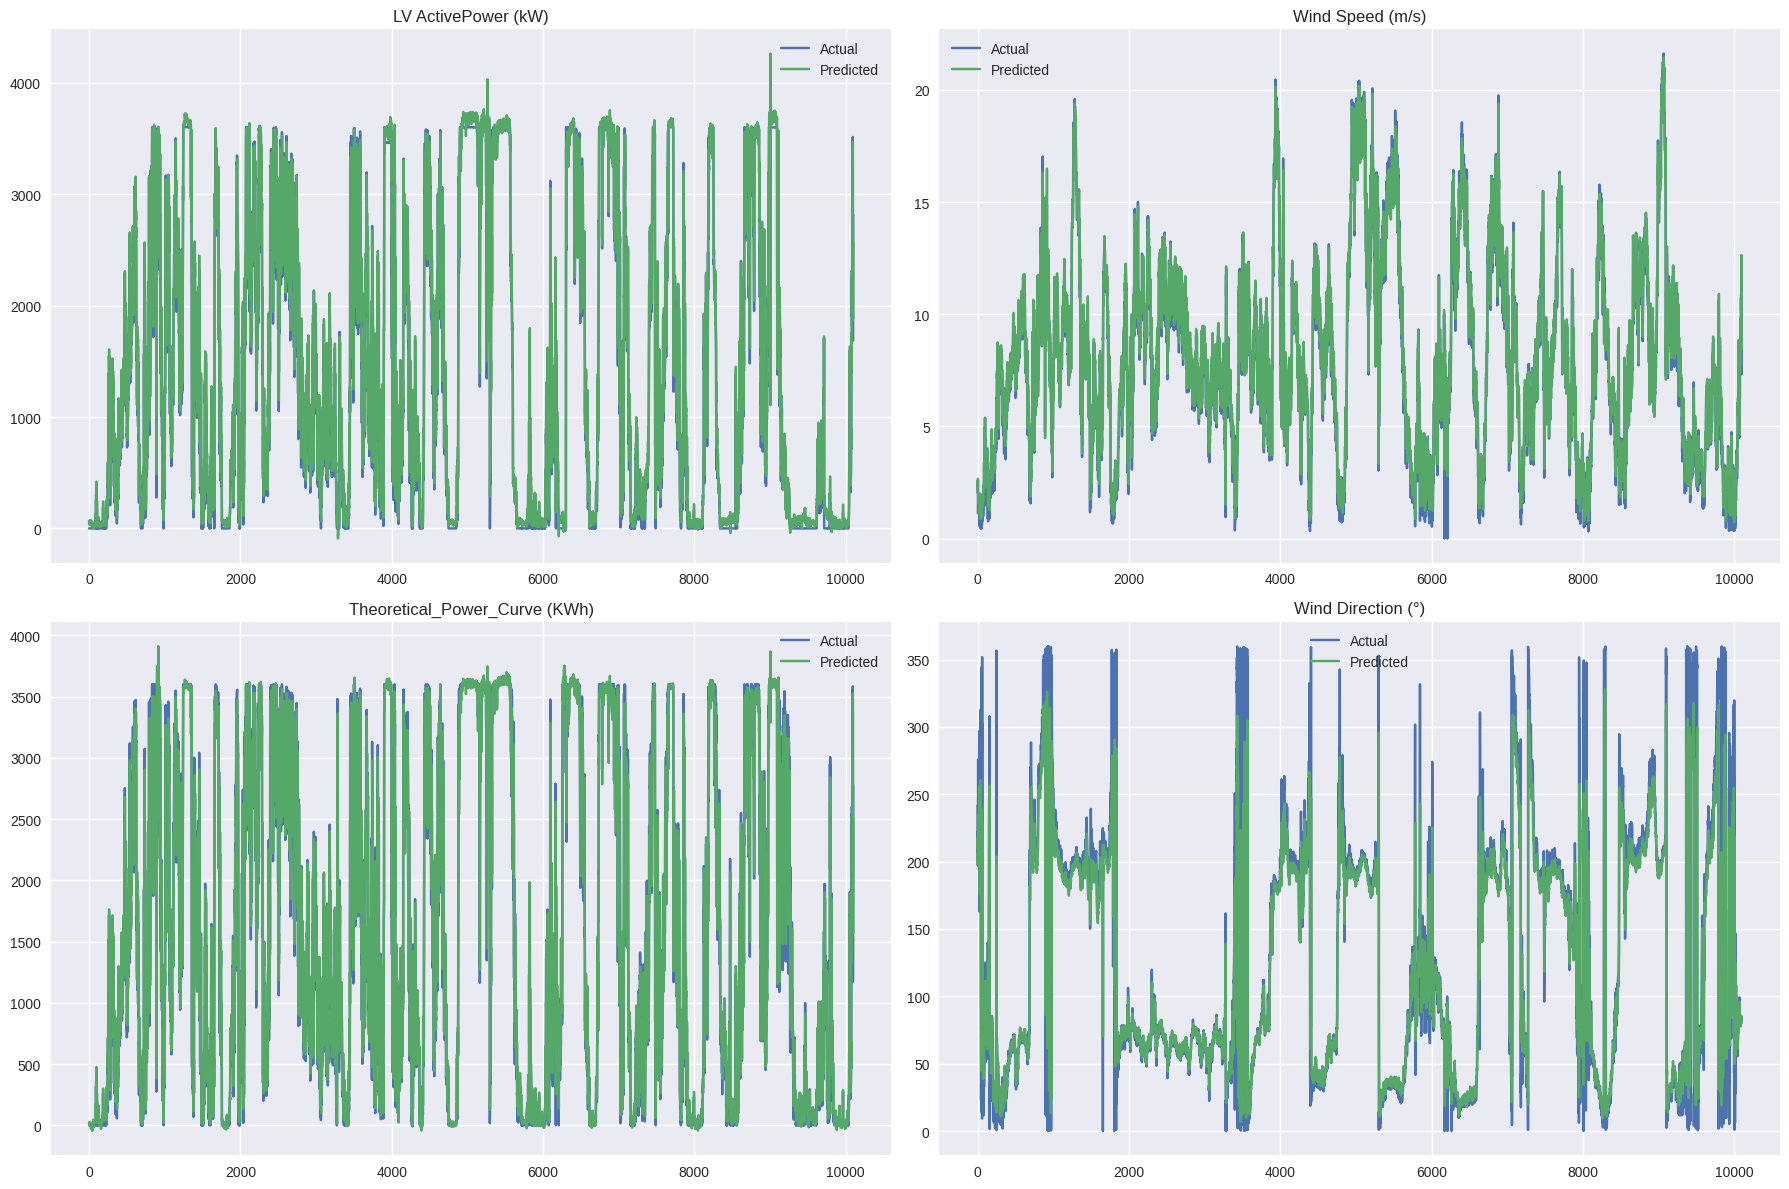

In [20]:
cols = ['LV ActivePower (kW)', 'Wind Speed (m/s)',
        'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']

plt.figure(figsize=(18, 12))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(actual[:, i], label='Actual')
    plt.plot(pred[:, i], label='Predicted')
    plt.title(cols[i])
    plt.legend()

plt.tight_layout()
plt.show()


In [22]:
df.columns

Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)', 'Hour', 'Day',
       'Month', 'WindSpeed_bin'],
      dtype='object')

In [23]:
import numpy as np

# 1. Power Ratio (Efficiency)
df['Power_Ratio'] = df['LV ActivePower (kW)'] / df['Theoretical_Power_Curve (KWh)']
df['Power_Ratio'] = df['Power_Ratio'].replace([np.inf, -np.inf], np.nan)

# 2. Wind Direction Quadrants
def quadrant(d):
    if 0 <= d <= 90:
        return "NE"
    elif 90 < d <= 180:
        return "SE"
    elif 180 < d <= 270:
        return "SW"
    else:
        return "NW"

df['Wind_Direction_Quad'] = df['Wind Direction (°)'].apply(quadrant)

# 3. Rolling averages (smoothing)
df['WindSpeed_roll10'] = df['Wind Speed (m/s)'].rolling(window=10).mean()
df['Power_roll10'] = df['LV ActivePower (kW)'].rolling(window=10).mean()

df.head()


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Hour,Day,Month,WindSpeed_bin,Power_Ratio,Wind_Direction_Quad,WindSpeed_roll10,Power_roll10
Date/Time,,,,,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,1,Medium,0.912855,SW,NaN,NaN
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,1,Medium,0.872772,SW,NaN,NaN
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,1,Medium,0.783772,NW,NaN,NaN
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1,1,Medium,0.813066,NW,NaN,NaN
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1,1,Medium,0.774148,SW,NaN,NaN


In [24]:
# Anomaly threshold = 50%
df['Anomaly'] = df['LV ActivePower (kW)'] < (0.5 * df['Theoretical_Power_Curve (KWh)'])
df['Anomaly'] = df['Anomaly'].astype(int)  # 1 = anomaly, 0 = normal

df['Anomaly'].value_counts()


,count
Anomaly,
0,45418
1,5112


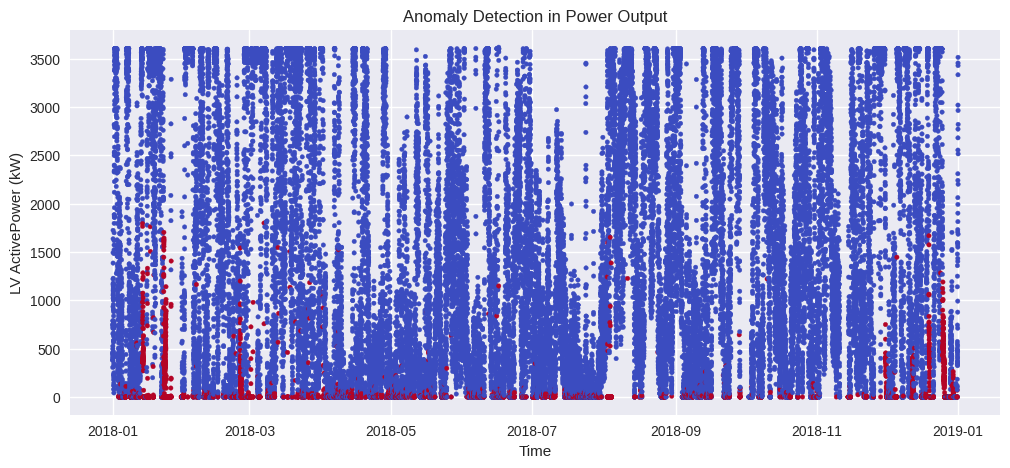

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.scatter(df.index, df['LV ActivePower (kW)'],
            c=df['Anomaly'], cmap='coolwarm', s=10)
plt.title("Anomaly Detection in Power Output")
plt.ylabel("LV ActivePower (kW)")
plt.xlabel("Time")
plt.show()


In [26]:
anomalies = df[df['Anomaly'] == 1]
anomalies.head()


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Hour,Day,Month,WindSpeed_bin,Power_Ratio,Wind_Direction_Quad,WindSpeed_roll10,Power_roll10,Anomaly
Date/Time,,,,,,,,,,,,,
2018-01-03 15:30:00,7.347679,3.011371,16.374212,238.690598,15,3,1,Low,0.448735,SW,5.253996,401.486903,1
2018-01-03 15:40:00,0.000000,3.743307,83.986265,245.068207,15,3,1,Low,0.000000,SW,5.181062,383.185622,1
2018-01-03 15:50:00,12.344200,3.246252,28.731272,238.076508,15,3,1,Low,0.429643,SW,5.013825,356.500441,1
2018-01-03 16:00:00,-0.393068,2.185888,0.000000,238.410294,16,3,1,Low,NaN,SW,4.669831,310.439473,1
2018-01-03 16:40:00,0.000000,3.034003,17.180593,221.086502,16,3,1,Low,0.000000,SW,3.225827,56.841603,1


In [27]:
# Avoid division errors
df['Performance_Score'] = (df['LV ActivePower (kW)'] /
                           df['Theoretical_Power_Curve (KWh)']) * 100

df['Performance_Score'] = df['Performance_Score'].clip(lower=0, upper=100)
df['Performance_Score'].fillna(0, inplace=True)

df[['LV ActivePower (kW)', 'Theoretical_Power_Curve (KWh)', 'Performance_Score']].head()


/tmp/ipython-input-1671320895.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Performance_Score'].fillna(0, inplace=True)


,LV ActivePower (kW),Theoretical_Power_Curve (KWh),Performance_Score
Date/Time,,,
2018-01-01 00:00:00,380.047791,416.328908,91.285468
2018-01-01 00:10:00,453.769196,519.917511,87.277152
2018-01-01 00:20:00,306.376587,390.900016,78.377226
2018-01-01 00:30:00,419.645905,516.127569,81.306625
2018-01-01 00:40:00,380.650696,491.702972,77.414764


In [28]:
def classify(score):
    if score >= 75:
        return "Good"
    elif score >= 50:
        return "Moderate"
    else:
        return "Poor"

df['Performance_Class'] = df['Performance_Score'].apply(classify)
df['Performance_Class'].value_counts()


,count
Performance_Class,
Good,34938
Poor,12396
Moderate,3196


In [29]:
def suggest(status):
    if status == "Good":
        return "Turbine performing efficiently. Maintain current operations."
    elif status == "Moderate":
        return "Moderate efficiency detected. Check wind speed alignment and inspect blades."
    else:
        return "Poor performance detected! Possible mechanical issues—inspect immediately."

df['AI_Suggestion'] = df['Performance_Class'].apply(suggest)

df[['Performance_Score', 'Performance_Class', 'AI_Suggestion']].head()


,Performance_Score,Performance_Class,AI_Suggestion
Date/Time,,,
2018-01-01 00:00:00,91.285468,Good,Turbine performing efficiently. Maintain curre...
2018-01-01 00:10:00,87.277152,Good,Turbine performing efficiently. Maintain curre...
2018-01-01 00:20:00,78.377226,Good,Turbine performing efficiently. Maintain curre...
2018-01-01 00:30:00,81.306625,Good,Turbine performing efficiently. Maintain curre...
2018-01-01 00:40:00,77.414764,Good,Turbine performing efficiently. Maintain curre...


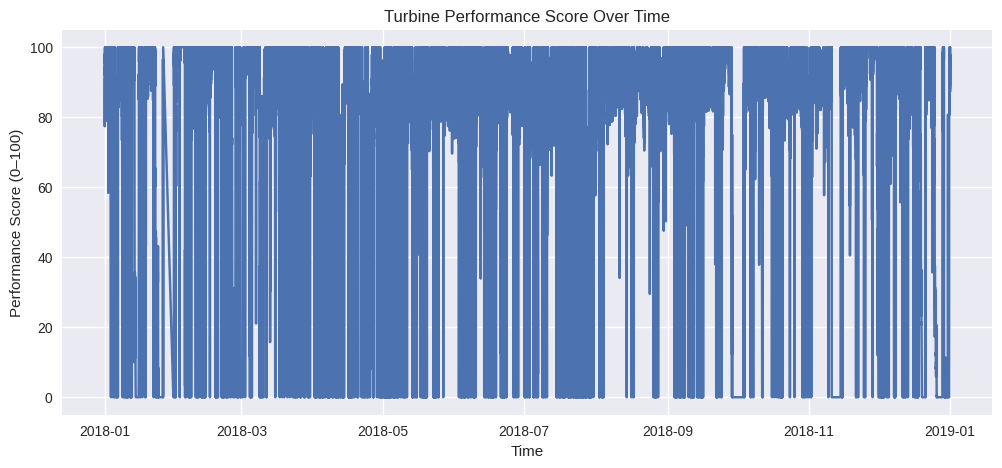

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Performance_Score'])
plt.xlabel("Time")
plt.ylabel("Performance Score (0–100)")
plt.title("Turbine Performance Score Over Time")
plt.grid(True)
plt.show()


#  Final Summary

This project completes a full wind turbine monitoring pipeline:

### ✔ EDA
- Identified patterns, trends, and power curve behavior

### ✔ Forecasting
- Built LSTM model to predict 4 key turbine parameters
- Useful for predictive maintenance

### ✔ Anomaly Detection
- Detected underperformance using theoretical vs actual power difference

### ✔ AI Scoring System
- Generated turbine performance score (0–100)
- Classified turbine state
- Provided actionable AI suggestions

### 💡 Conclusion:
This pipeline can be integrated into real-world turbine monitoring systems to improve:
- Power output  
- Maintenance scheduling  
- Fault detection  
- Overall turbine efficiency  
